# HAC variance estimation

Use two data files [FwdSpot1.dat](https://github.com/khrapovs/metrix/tree/master/data/ExchangeRates/FwdSpot1.dat) and [FwdSpot3.dat](https://github.com/khrapovs/metrix/tree/master/data/ExchangeRates/FwdSpot3.dat). The former contains monthly spot and 1-month forward exchange rates, the latter monthly spot and 3-month forward exchange rates, in \$/foreign currency, for the British Pound,
French Franc and Japanese Yen, for 1973:3 to 1992:8 (234 observations).
Each row contains the month, the year, the spot rates for Pound, Franc, and Yen, and then the forward rates for the same three currencies. Download the data, then take logarithms of the rates.

We are interested in testing the conditional unbiasedness hypothesis that
$$
\mathbb{E}_{t}\left[s_{t+k}\right]=f_{t,k},
$$
where $s_{t}$ is the spot rate at $t$, $f_{t,k}$ is the forward rate for $k$-month forwards at $t$,
and $\mathbb{E}_{t}$ denoted mathematical expectation conditional on time $t$  information.
The above statement says that the forward rate is a conditionally unbiased predictor of the future spot exchange rate.
To test this theory, it is conventional to nest the above expectation hypothesis within the following econometric model:
$$
s_{t+k}-s_{t}=\alpha+\beta\left(f_{t,k}-s_{t}\right)+e_{t+k},\quad\mathbb{E}_{t}\left[e_{t+k}\right]=0,
$$
and test $H_{0}:\alpha=0,\beta=1$. The current spot rate is subtracted to achieve stationarity.
The difference $s_{t+k}-s_{t}$ is called the exchange rate depreciation, the difference $f_{t,k}-s_{t}$ the forward premium.
Do the following exercises for the three currencies comparing the results across the currencies throughout.

- For both types of forwards, estimate the model by OLS. Report parameter estimates with appropriate standard errors.

The model at hand is simply a linear model with possibly autocorrelated and heteroscedastic errors. The estimator in general is
$$
\hat{\beta}_{T}=\left(X^{\prime}X\right)^{-1}X^{\prime}Y.
$$
It's asymptotic distribution is
$$
\sqrt{T}\left(\hat{\beta}_{T}-\beta_{0}\right)\overset{d}{\longrightarrow}
N\left(0,\mathbb{E}\left[X_{t}X_{t}^{\prime}\right]^{-1}
\mathbb{E}\left[e_{t}^{2}X_{t}X_{t}^{\prime}\right]
\mathbb{E}\left[X_{t}X_{t}^{\prime}\right]^{-1}\right)
$$
if the errors are uncorrelated. The asymptotic covariance matrix can be estimated by (White's estimator)
$$
\hat{V}_{\hat{\beta}}
=\left(X^{\prime}X\right)^{-1}\left(X^{\prime}\text{diag}
\left(\hat{e}^{2}\right)X\right)\left(X^{\prime}X\right)^{-1}.
$$ 

- Test conditional unbiasedness using asymptotic theory.

One could use Wald statistic
$$
W_{T}=\left(\hat{\theta}-\theta\right)^{\prime}
\hat{V}_{\hat{\theta}}^{-1}\left(\hat{\theta}-\theta\right),
$$
where $\hat{\theta}=r\left(\hat{\beta}\right)$ is the unrestricted estimate and $\theta=r\left(\beta\right)$ is the restriction being tested. The asymptotic distribution of this test statistic is $\chi_{q}^{2}$, where $q=\text{rank}\left(\partial r/\partial\beta^{\prime}\right)$. We also know that
$$
\hat{V}_{\hat{\theta}}=\hat{R}^{\prime}\hat{V}_{\hat{\beta}}\hat{R},
$$
where
$$
\hat{R}=\frac{\partial}{\partial\beta}r\left(\hat{\beta}\right)^{\prime}.
$$
In our case $r\left(\beta\right)=\beta$, $\theta=\left[0,1\right]^{\prime}$, and $R$ is the identity matrix.

- With 3-month forwards, try estimation of the long run variance with the Hansen-Hodrick, Newey-West, and Andrews (with the Parzen kernel) estimators.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import datetime as dt
from numpy.linalg import inv, lstsq
from scipy.stats import chi2

# For inline pictures
%matplotlib inline
# For nicer output of Pandas dataframes
pd.set_option('float_format', '{:8.2f}'.format)

sns.set_context('notebook')

### Read fixed wdth data automatically using Pandas library

In [2]:
names = ['Month', 'Year', 'SpotPound', 'SpotFranc', 'SpotYen', 'FwdPound', 'FwdFranc', 'FwdYen']
df1 = pd.read_fwf('../data/ExchangeRates/FwdSpot1.dat', names=names)
df3 = pd.read_fwf('../data/ExchangeRates/FwdSpot3.dat', names=names)
print(df1.head())
print(df3.head())

   Month  Year  SpotPound  SpotFranc  SpotYen  FwdPound  FwdFranc   FwdYen
0      3    73       2.48       0.22     0.00      2.47      0.22     0.00
1      4    73       2.49       0.22     0.00      2.48      0.22     0.00
2      5    73       2.57       0.23     0.00      2.57      0.23     0.00
3      6    73       2.58       0.24     0.00      2.58      0.24     0.00
4      7    73       2.51       0.24     0.00      2.50      0.24     0.00
   Month  Year  SpotPound  SpotFranc  SpotYen  FwdPound  FwdFranc   FwdYen
0      3    73       2.48       0.22     0.00      2.46      0.22     0.00
1      4    73       2.49       0.22     0.00      2.47      0.22     0.00
2      5    73       2.57       0.23     0.00      2.56      0.23     0.00
3      6    73       2.58       0.24     0.00      2.57      0.24     0.00
4      7    73       2.51       0.24     0.00      2.49      0.24     0.00


### Transform data and create date index

In [3]:
def date(x):
    return dt.date(1900 + int(x['Year']), int(x['Month']), 1)

def transform_data(df):
    df['Date'] = df.apply(date, axis=1)
    df.set_index('Date', inplace=True)
    df.drop(['Year','Month'], axis=1, inplace=True)
    df = np.log(df)
    return df

df1 = transform_data(df1)
df3 = transform_data(df3)
print(df1.head())

            SpotPound  SpotFranc  SpotYen  FwdPound  FwdFranc   FwdYen
Date                                                                  
1973-03-01       0.91      -1.51    -5.59      0.90     -1.51    -5.58
1973-04-01       0.91      -1.52    -5.58      0.91     -1.52    -5.58
1973-05-01       0.94      -1.47    -5.58      0.94     -1.47    -5.57
1973-06-01       0.95      -1.42    -5.57      0.95     -1.42    -5.56
1973-07-01       0.92      -1.42    -5.58      0.92     -1.42    -5.57


### Plot some data

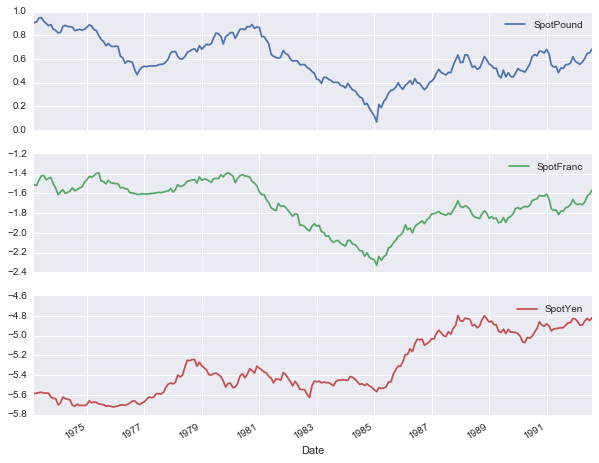

In [4]:
df1[['SpotPound', 'SpotFranc', 'SpotYen']].plot(figsize=(10, 8), subplots=True)
plt.show()

### Define weighting kernels

In [5]:
def White(x):
    return 0

def HansenHodrick(x):
    if abs(x) <= 1:
        return 1
    else:
        return 0

def Bartlett(x):
    if abs(x) <= 1:
        return 1 - abs(x)
    else:
        return 0

def Parzen(x):
    if abs(x) <= .5:
        return 1 - 6 * x**2 + 6 * abs(x)**3
    if abs(x) > .5 and abs(x) <= .5:
        return 3 * (1 - abs(x)**3)
    else:
        return 0

The following function makes a selection of the requested kernel according to `name` variable.

In [6]:
def kernel(x, name):
    kernels = {'White' : White,
               'HansenHodrick' : HansenHodrick,
               'Bartlett' : Bartlett,
               'Parzen' : Parzen}
    return kernels[name](x)

### HAC variance estimation

In [7]:
def HAC(e, X, kern):
    N = X.shape[0]
    q = round(N**(1/5))
    for m in range(0, N):
        G = np.dot(X[m:].T * e[m:], (X[:N-m].T * e[:N-m]).T)
        if m == 0:
            S = G
        else:
            w = kernel(m / q, kern)
            S += w * (G + G.T)
    Q = inv(np.dot(X.T, X))
    V = np.dot(Q, S).dot(Q)
    return V

### OLS estimation

In [8]:
def ols(Y, X, kern):
    Y = np.array(Y)
    X = np.vstack((np.ones_like(X), X)).T
    Qxx = np.dot(X.T, X)
    Qxy = np.dot(X.T, Y)
    # Parameter estimate
    beta = np.dot(inv(Qxx), Qxy)
    # Residual estimates
    e = Y - np.dot(X, beta)
    # Estimate of asymptotic variance
    V = HAC(e, X, kern)
    # Corresponding standard errors
    s = np.diag(V) ** .5
    # t-statistics
    t = beta / s
    return beta, V, s, t

### Wald test of equality restrictions

In [9]:
def Wald(beta_hat, beta, V):
    # Test statistic
    W = np.dot(beta_hat - beta, inv(V)).dot((beta_hat - beta).T)
    # p-value of the test
    p = 1 - chi2.cdf(W, 2)
    return W, p

### Run regressions and collect results

In [10]:
# Create lists for all available options
currency = ['Pound', 'Franc', 'Yen']
kernels = ['White', 'HansenHodrick', 'Bartlett', 'Parzen']

# Run over two data sets and correspondig lags
for df, lag in zip([df1, df3], [1, 3]):
    
    # Create dictionary container for the results
    tb = dict()
    
    for c in currency:
        for kern in kernels:
            
            # Create Y and X according to the model
            Y = (df['Spot' + c].diff(lag)).iloc[lag:]
            X = (df['Fwd' + c].shift(lag) - df['Spot' + c].shift(lag)).iloc[lag:]
            
            # OLS estimation results
            beta, V, s, t = ols(Y, X, kern)
            
            # Restriction on parameters
            beta_restr = np.array([0,1])
            # Wald test statistic
            W, p = Wald(beta, beta_restr, V)
            
            # Dictionary of results
            tb[c, kern] = {'alpha*1e2' : beta[0]*1e2, 'beta' : beta[1],
                           't(alpha)' : t[0], 't(beta)' : t[1],
                           'W' : W, 'p' : p}
    
    # Convert dictionary to DataFrame
    tb = pd.DataFrame(tb).T
    print(tb, '\n')

                           W  alpha*1e2     beta        p  t(alpha)  t(beta)
Franc Bartlett          6.35      -0.23    -0.96     0.04     -0.83    -1.18
      HansenHodrick     6.54      -0.23    -0.96     0.04     -0.74    -1.19
      Parzen            6.29      -0.23    -0.96     0.04     -0.87    -1.18
      White             5.73      -0.23    -0.96     0.06     -0.88    -1.13
Pound Bartlett          5.68      -0.23    -0.73     0.06     -0.88    -0.98
      HansenHodrick     3.93      -0.23    -0.73     0.14     -0.82    -0.82
      Parzen            6.58      -0.23    -0.73     0.04     -0.91    -1.05
      White             7.45      -0.23    -0.73     0.02     -0.97    -1.13
Yen   Bartlett          6.17       0.36    -0.15     0.05      1.52    -0.31
      HansenHodrick     5.56       0.36    -0.15     0.06      1.40    -0.29
      Parzen            5.15       0.36    -0.15     0.08      1.48    -0.28
      White             4.90       0.36    -0.15     0.09      1.54    -0.27